In [6]:
import models
import functions
from data_utils import load_mnist
import matplotlib.pyplot as plt
import optimization 

In [7]:
device = "cpu"
X, y = load_mnist(device)

In [8]:
# One-hot encode the labels and normalize the pixel intensities to [-1, 1]
yhot = functions.one_hot_encode(y, 10)
Xnorm = 2*(X/255 - 1/2)

X_train, y_train = Xnorm[:60000], yhot[:60000]
X_val, y_val = Xnorm[60000:], yhot[60000:]

In [20]:
# Initialize dense network 
input_size = X.shape[-1]
output_size = 10
mlp = models.MLP([input_size, 300, 100, 100, 100, output_size], device=device)
sgd = optimization.Optimizer_SGD(1e-2)
adam = optimization.Optimizer_Adam()
trainer = optimization.Trainer(adam)
print(mlp)

Linear layer with input->output = 784->300. Total params = 235500
Linear layer with input->output = 300->100. Total params = 30100
Linear layer with input->output = 100->100. Total params = 10100
Linear layer with input->output = 100->100. Total params = 10100
Linear layer with input->output = 100->10. Total params = 1010


In [21]:
trainer.train(mlp, X_train, y_train, 64, 20, X_val=X_val, y_val=y_val)

[Epoch: 1, batch: 1]/937                         loss: 0.030
[Epoch: 1, batch: 101]/937                         loss: 1.172
[Epoch: 1, batch: 201]/937                         loss: 0.576
[Epoch: 1, batch: 301]/937                         loss: 0.486
[Epoch: 1, batch: 401]/937                         loss: 0.385
[Epoch: 1, batch: 501]/937                         loss: 0.364
[Epoch: 1, batch: 601]/937                         loss: 0.324
[Epoch: 1, batch: 701]/937                         loss: 0.321
[Epoch: 1, batch: 801]/937                         loss: 0.303
[Epoch: 1, batch: 901]/937                         loss: 0.288
[Epoch: 1, test accuracy: 0.913, validation accuracy: 0.916
Best accuracy: 0.916
[Epoch: 2, batch: 1]/937                         loss: 0.003
[Epoch: 2, batch: 101]/937                         loss: 0.262
[Epoch: 2, batch: 201]/937                         loss: 0.250
[Epoch: 2, batch: 301]/937                         loss: 0.245
[Epoch: 2, batch: 401]/937               

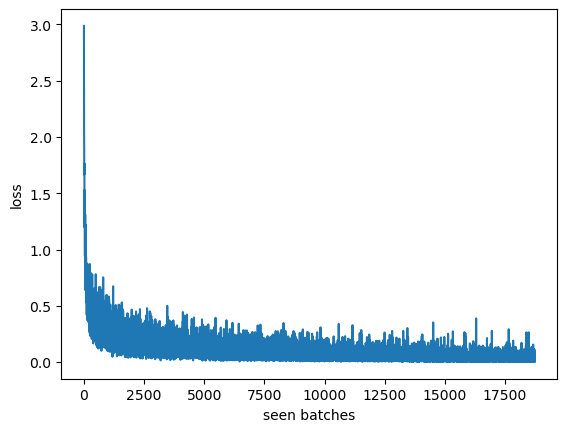

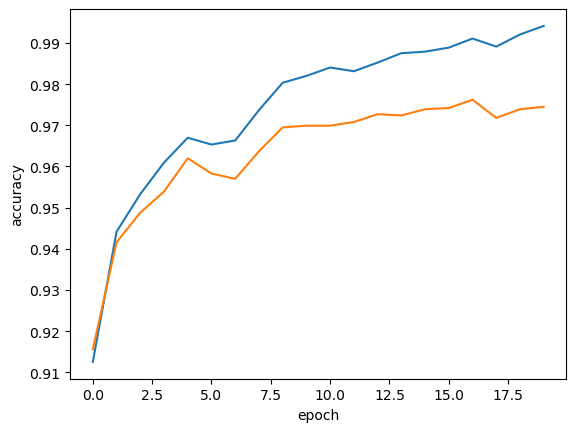

In [22]:
trainer.plot()